In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

# Criando dataset Menor

In [ ]:
# # Treino
# !mkdir -p /content/drive/MyDrive/DatasetPlacas/dataset_reduzido/images/train
# !mkdir -p /content/drive/MyDrive/DatasetPlacas/dataset_reduzido/labels/train

# # Validação
# !mkdir -p /content/drive/MyDrive/DatasetPlacas/dataset_reduzido/images/val
# !mkdir -p /content/drive/MyDrive/DatasetPlacas/dataset_reduzido/labels/val

# import os, random, shutil

# def copiar_aleatorio(src_img, src_lbl, dst_img, dst_lbl, n):
#     arquivos = os.listdir(src_img)
#     random.shuffle(arquivos)
#     for arquivo in arquivos[:n]:
#         shutil.copy(os.path.join(src_img, arquivo), dst_img)
#         label = arquivo.rsplit('.', 1)[0] + '.txt'
#         shutil.copy(os.path.join(src_lbl, label), dst_lbl)

# # Caminhos originais
# orig_train_img = "/content/drive/MyDrive/DatasetPlacas/dataset/images/train"
# orig_train_lbl = "/content/drive/MyDrive/DatasetPlacas/dataset/labels/train"
# orig_val_img = "/content/drive/MyDrive/DatasetPlacas/dataset/images/val"
# orig_val_lbl = "/content/drive/MyDrive/DatasetPlacas/dataset/labels/val"

# # Caminhos reduzidos
# dst_train_img = "/content/drive/MyDrive/DatasetPlacas/dataset_reduzido/images/train"
# dst_train_lbl = "/content/drive/MyDrive/DatasetPlacas/dataset_reduzido/labels/train"
# dst_val_img = "/content/drive/MyDrive/DatasetPlacas/dataset_reduzido/images/val"
# dst_val_lbl = "/content/drive/MyDrive/DatasetPlacas/dataset_reduzido/labels/val"

# # Copiar 3.5k treino e 1k validação
# copiar_aleatorio(orig_train_img, orig_train_lbl, dst_train_img, dst_train_lbl, 3500)
# copiar_aleatorio(orig_val_img, orig_val_lbl, dst_val_img, dst_val_lbl, 1000)

In [7]:

#!pip install ultralytics
# !unzip -q /content/drive/MyDrive/DatasetPlacas/dataset.zip -d /content/drive/MyDrive/DatasetPlacas/
# Importa o modelo
from ultralytics import YOLO
# Caminhos
dataset_path = 'dataset'
dados = 'dados.yaml'

# yolov8n.pt sem augmentation

In [ ]:

destino = 'v8n_plate.pt'  # destino no seu Google Drive



# Treina o modelo do 0
# Cria o modelo
#model = YOLO('yolov8n.pt')  # modelo base nano

# model.train(data=dados, epochs=100, imgsz=600)
# Continua treinamento
model = YOLO('runs/detect/train/weights/last.pt')
model.train(resume=True)

# Caminho do best.pt gerado (geralmente dentro de runs/detect/train/)
import shutil
import os
import glob

# Encontra o caminho do último treino
ultimo_treino = sorted(glob.glob('runs/detect/train*'))[-1]
modelo_best = os.path.join(ultimo_treino, 'weights/best.pt')

# Copia o best.pt para seu Google Drive
shutil.copy(modelo_best, destino)

print(f'Modelo salvo em: {destino}')


Ultralytics 8.3.178 🚀 Python-3.12.3 torch-2.8.0+cu128 CPU (Intel Core(TM) i5-4460  3.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dados.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=608, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/train/weights/last.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

train: Scanning /home/angelo/Documentos/treinoplacas/yolotests/dataset/labels/train.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 170.3±20.4 MB/s, size: 158.6 KB)



/home/angelo/Documentos/treinoplacas/yolotests/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /home/angelo/Documentos/treinoplacas/yolotests/dataset/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
/home/angelo/Documentos/treinoplacas/yolotests/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Resuming training runs/detect/train/weights/last.pt from epoch 96 to 100 total epochs
Closing dataloader mosaic
Image sizes 608 train, 608 val
Using 0 dataloader workers
Logging results to /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G      0.375     0.2313      0.788         16        608: 100%|██████████| 50/50 [04:08<00:00,  4.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.03s/it]

                   all        200        200          1          1      0.995      0.927

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     97/100         0G      0.369       0.23     0.7854         16        608: 100%|██████████| 50/50 [04:06<00:00,  4.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.00s/it]

                   all        200        200          1          1      0.995      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.3673     0.2224     0.7904         16        608: 100%|██████████| 50/50 [04:07<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.07s/it]

                   all        200        200          1          1      0.995       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.3727     0.2243     0.7916         16        608: 100%|██████████| 50/50 [04:07<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.08s/it]

                   all        200        200      0.999          1      0.995      0.925

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



    100/100         0G     0.3534     0.2165     0.7838         16        608: 100%|██████████| 50/50 [04:08<00:00,  4.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.10s/it]

                   all        200        200      0.999          1      0.995      0.928



5 epochs completed in 0.364 hours.
Optimizer stripped from /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train2/weights/best.pt, 6.2MB

Validating /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train2/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.12.3 torch-2.8.0+cu128 CPU (Intel Core(TM) i5-4460  3.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.86s/it]


                   all        200        200          1          1      0.995      0.931
Speed: 1.3ms preprocess, 54.8ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train2
Modelo salvo em: v8n_plate.pt


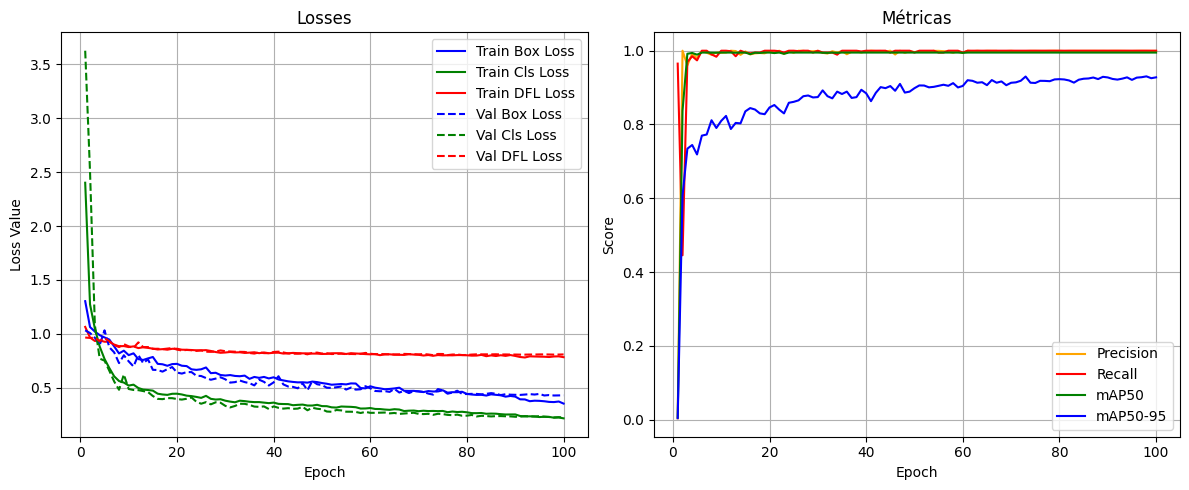

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def grafico_evolution(path):
    evolution = pd.read_csv(path)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 linha, 2 colunas

    # --- Subplot 1: Losses ---
    axs[0].plot(evolution['epoch'], evolution['train/box_loss'], label='Train Box Loss', color='blue')
    axs[0].plot(evolution['epoch'], evolution['train/cls_loss'], label='Train Cls Loss', color='green')
    axs[0].plot(evolution['epoch'], evolution['train/dfl_loss'], label='Train DFL Loss', color='red')

    axs[0].plot(evolution['epoch'], evolution['val/box_loss'], label='Val Box Loss', linestyle='--', color='blue')
    axs[0].plot(evolution['epoch'], evolution['val/cls_loss'], label='Val Cls Loss', linestyle='--', color='green')
    axs[0].plot(evolution['epoch'], evolution['val/dfl_loss'], label='Val DFL Loss', linestyle='--', color='red')

    axs[0].set_title('Losses')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss Value')
    axs[0].legend()
    axs[0].grid(True)

    # --- Subplot 2: Métricas ---
    axs[1].plot(evolution['epoch'], evolution['metrics/precision(B)'], label='Precision', color='orange')
    axs[1].plot(evolution['epoch'], evolution['metrics/recall(B)'], label='Recall', color='red')
    axs[1].plot(evolution['epoch'], evolution['metrics/mAP50(B)'], label='mAP50', color='green')
    axs[1].plot(evolution['epoch'], evolution['metrics/mAP50-95(B)'], label='mAP50-95', color='blue')

    axs[1].set_title('Métricas')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Score')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Exemplo de uso

grafico_evolution('results_v8n_sem_augmentation.csv')


# v8n com augmentation

In [9]:

destino = 'v8n_augmentado_plate.pt'  # nome diferente para não sobrescrever

# Importa o modelo
# from ultralytics import YOLO

# Cria o modelo
model = YOLO('yolov8n.pt')  # modelo base nano

# Treina o modelo com augmentation
model.train(
    data=dados,
    epochs=100,           # ainda define o limite máximo
    patience=10,          # para de treinar se não melhorar em 10 épocas
    imgsz=600,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    flipud=0.2,
    fliplr=0.5
)

# Encontra o caminho do último treino
ultimo_treino = sorted(glob.glob('runs/detect/train*'))[-1]
modelo_best = os.path.join(ultimo_treino, 'weights/best.pt')

# Copia o best.pt para o destino com nome customizado
shutil.copy(modelo_best, destino)

print(f'Modelo salvo em: {destino}')
grafico_evolution(os.path.join(ultimo_treino,'results.csv'))


Ultralytics 8.3.178 🚀 Python-3.12.3 torch-2.8.0+cu128 CPU (Intel Core(TM) i5-4460  3.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dados.yaml, degrees=10, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.2, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=600, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True, pro

train: Scanning /home/angelo/Documentos/treinoplacas/yolotests/dataset/labels/train.cache... 800 images, 0 backgrounds, 0 corrupt: 100%|██████████| 800/800 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3790.4±860.3 MB/s, size: 158.6 KB)



/home/angelo/Documentos/treinoplacas/yolotests/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning /home/angelo/Documentos/treinoplacas/yolotests/dataset/labels/val.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]

Plotting labels to /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train3/labels.jpg... 



/home/angelo/Documentos/treinoplacas/yolotests/venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 608 train, 608 val
Using 0 dataloader workers
Logging results to /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G      1.336      2.378      1.068         30        608: 100%|██████████| 50/50 [04:10<00:00,  5.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.29s/it]

                   all        200        200    0.00333          1      0.291      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G      1.171      1.342     0.9934         30        608: 100%|██████████| 50/50 [04:20<00:00,  5.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.09s/it]

                   all        200        200      0.972      0.881      0.981      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G       1.15      1.084      1.009         35        608: 100%|██████████| 50/50 [04:21<00:00,  5.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.11s/it]

                   all        200        200      0.977      0.864      0.961      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G      1.167     0.9212      1.032         35        608: 100%|██████████| 50/50 [04:04<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.03s/it]

                   all        200        200      0.965      0.925      0.984      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G      1.112      0.825      1.004         35        608: 100%|██████████| 50/50 [04:05<00:00,  4.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.13s/it]

                   all        200        200      0.939      0.929      0.985      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G       1.04     0.7341     0.9834         28        608: 100%|██████████| 50/50 [04:04<00:00,  4.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.10s/it]

                   all        200        200      0.965      0.976      0.991      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G      1.014     0.6714     0.9678         39        608: 100%|██████████| 50/50 [04:07<00:00,  4.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.01s/it]

                   all        200        200       0.96      0.965       0.99      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G      1.017     0.6481     0.9632         29        608: 100%|██████████| 50/50 [04:11<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        200        200      0.933      0.976      0.986      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.9991     0.6046     0.9594         31        608: 100%|██████████| 50/50 [04:09<00:00,  4.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:19<00:00,  2.80s/it]

                   all        200        200      0.999       0.98      0.995      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.9655     0.5696     0.9498         28        608: 100%|██████████| 50/50 [04:02<00:00,  4.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        200        200      0.965          1      0.988       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     11/100         0G      0.979     0.5802     0.9519         24        608: 100%|██████████| 50/50 [04:00<00:00,  4.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        200        200      0.985      0.998      0.993      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.9595     0.5716     0.9516         26        608: 100%|██████████| 50/50 [03:54<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.95s/it]

                   all        200        200      0.995       0.99      0.993      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.9585     0.5479     0.9458         22        608: 100%|██████████| 50/50 [03:59<00:00,  4.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        200        200      0.995      0.994      0.995      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.9187     0.5323     0.9347         30        608: 100%|██████████| 50/50 [03:56<00:00,  4.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.18s/it]

                   all        200        200      0.999          1      0.995      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.9071     0.5041     0.9208         24        608: 100%|██████████| 50/50 [04:12<00:00,  5.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.11s/it]

                   all        200        200      0.999          1      0.995      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.8707      0.497     0.9135         28        608: 100%|██████████| 50/50 [04:30<00:00,  5.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]

                   all        200        200          1      0.994      0.995      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.8683     0.4822     0.9229         27        608: 100%|██████████| 50/50 [04:20<00:00,  5.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.12s/it]

                   all        200        200      0.996          1      0.995      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.9031     0.4924     0.9224         26        608: 100%|██████████| 50/50 [04:06<00:00,  4.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.05s/it]

                   all        200        200      0.999      0.995      0.995      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.8563     0.4846     0.9211         21        608: 100%|██████████| 50/50 [04:09<00:00,  4.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.10s/it]

                   all        200        200          1      0.999      0.995      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.8462     0.4748     0.9113         24        608: 100%|██████████| 50/50 [04:11<00:00,  5.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.02s/it]

                   all        200        200      0.999          1      0.995      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G      0.864      0.476     0.9154         41        608: 100%|██████████| 50/50 [04:10<00:00,  5.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.03s/it]

                   all        200        200      0.991          1      0.995      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.8578     0.4666     0.8989         31        608: 100%|██████████| 50/50 [04:13<00:00,  5.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]

                   all        200        200          1      0.999      0.995      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     23/100         0G      0.848       0.47     0.9124         31        608: 100%|██████████| 50/50 [06:14<00:00,  7.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:25<00:00,  3.68s/it]

                   all        200        200       0.98      0.985      0.993       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G      0.855     0.4745     0.9171         23        608: 100%|██████████| 50/50 [06:29<00:00,  7.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:24<00:00,  3.53s/it]

                   all        200        200      0.984          1      0.995      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.8366     0.4566     0.8996         30        608: 100%|██████████| 50/50 [07:31<00:00,  9.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:26<00:00,  3.76s/it]

                   all        200        200      0.997          1      0.995      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.8043     0.4409      0.912         32        608: 100%|██████████| 50/50 [06:36<00:00,  7.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        200        200      0.996       0.99      0.995      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     27/100         0G     0.8318     0.4452     0.9182         21        608: 100%|██████████| 50/50 [03:54<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        200        200          1          1      0.995      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



     28/100         0G     0.8382     0.4561     0.8998         32        608: 100%|██████████| 50/50 [03:54<00:00,  4.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        200        200       0.99      0.994      0.992      0.791
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 18, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

28 epochs completed in 2.227 hours.


Optimizer stripped from /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train3/weights/best.pt, 6.2MB

Validating /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train3/weights/best.pt...
Ultralytics 8.3.178 🚀 Python-3.12.3 torch-2.8.0+cu128 CPU (Intel Core(TM) i5-4460  3.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.72s/it]


                   all        200        200      0.999      0.995      0.995      0.805
Speed: 1.1ms preprocess, 50.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /home/angelo/Documentos/treinoplacas/yolotests/runs/detect/train3


NameError: name 'glob' is not defined

Modelo salvo em: v8n_augmentado_plate.pt


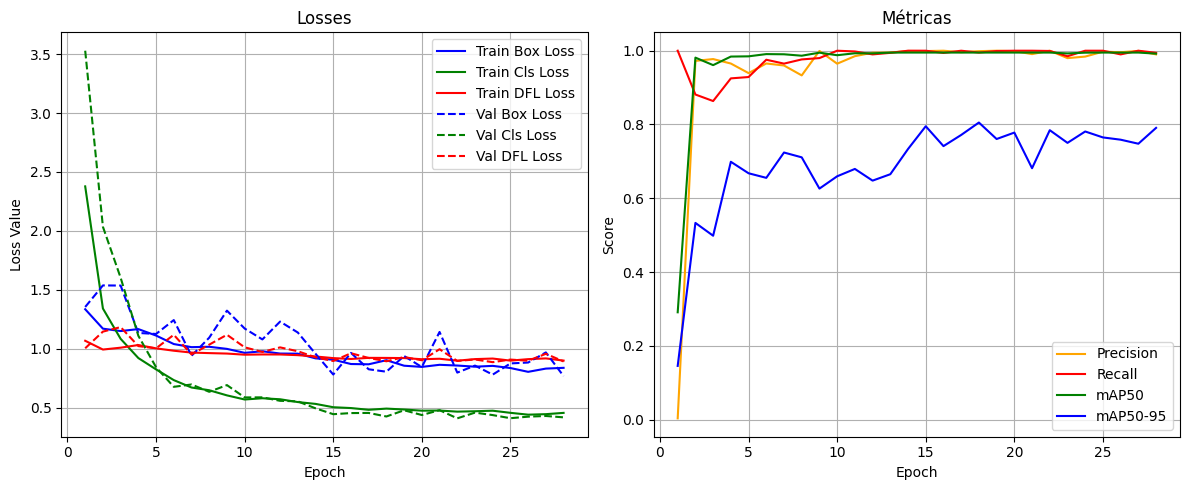

In [12]:
import glob
import os
import shutil
# Encontra o caminho do último treino
ultimo_treino = sorted(glob.glob('runs/detect/train*'))[-1]
modelo_best = os.path.join(ultimo_treino, 'weights/best.pt')

# Copia o best.pt para o destino com nome customizado
shutil.copy(modelo_best, destino)

print(f'Modelo salvo em: {destino}')
grafico_evolution(os.path.join(ultimo_treino,'results.csv'))

# v8s sem augmentation

In [ ]:
destino = 'v8s_plate.pt'  # destino no seu Google Drive

model = YOLO('yolov8s.pt')  # modelo base small

# Treina o modelo com early stopping
model.train(
    data=dados,
    epochs=100,
    patience=10,   # para se não melhorar em 10 épocas seguidas
    imgsz=600
)

# Encontra o caminho do último treino
ultimo_treino = sorted(glob.glob('runs/detect/train*'))[-1]
modelo_best = os.path.join(ultimo_treino, 'weights/best.pt')

# Copia o best.pt para seu Google Drive
shutil.copy(modelo_best, destino)

print(f'Modelo salvo em: {destino}')
grafico_evolution(os.path.join(ultimo_treino,'results.csv'))


# yolov8s.pt com augmentation


In [ ]:

destino = 'v8s_augmentado_plate.pt'  # nome diferente para não sobrescrever

# Importa o modelo
# from ultralytics import YOLO

# Cria o modelo
model = YOLO('yolov8s.pt')  # modelo base nano

# Treina o modelo com augmentation
model.train(
    data=dados,
    epochs=100,           # ainda define o limite máximo
    patience=10,          # para de treinar se não melhorar em 10 épocas
    imgsz=600,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    flipud=0.2,
    fliplr=0.5
)

# Encontra o caminho do último treino
ultimo_treino = sorted(glob.glob('runs/detect/train*'))[-1]
modelo_best = os.path.join(ultimo_treino, 'weights/best.pt')

# Copia o best.pt para o destino com nome customizado
shutil.copy(modelo_best, destino)

print(f'Modelo salvo em: {destino}')
grafico_evolution(os.path.join(ultimo_treino,'results.csv'))
